In [14]:
# Задача 1
import re

def find_num(text):
    sorted_numbers = re.findall(r'\d+', text)
    numbers = ''.join(sorted_numbers)
    result = numbers[::-1]
    return result
result = find_num('abc123def456')
print(result) 

654321


In [23]:
# Задача 2
import spacy
nlp = spacy.load("en_core_web_sm")

In [19]:
def find_nouns(text):
    doc = nlp(text)
    nouns = [token.text for token in doc if token.pos_ == "NOUN" or token.pos_ == "PROPN"]    
    return nouns

text = "Apple is a fruit."
nouns = find_nouns(text)
print(nouns)

['Apple', 'fruit']


In [80]:
# задача 3
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
def remove_stopwords(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word not in punctuation]
    return filtered_words

text ="This is a sample text."
words = remove_stopwords(text)
print(words) 

['sample', 'text']


In [59]:
#Задача 4
def tokenize_text(text):
    return [word for word in re.sub(r'[^a-zA-Z0-9]', ' ', text).lower().split()]

print(tokenize_text("This is @ a sample_ text."))

['this', 'is', 'a', 'sample', 'text']


In [ ]:
# Задача 5

In [60]:
import pandas as pd

In [65]:
def ner_to_dataframe(text):
  doc = nlp(text)
  entities = [(ent.text, ent.label_) for ent in doc.ents]
  df = pd.DataFrame(entities, columns=['text', 'label'])
  return df
ner_to_dataframe("The Eiffel Tower is located in Paris, France.")

,text,label
0,The Eiffel Tower,LOC
1,Paris,GPE
2,France,GPE


Я сдала дз по VK, но интересно сделать облачко 

In [67]:
!wget https://raw.githubusercontent.com/orgtre/google-books-ngram-frequency/refs/heads/main/ngrams/2grams_english.csv

--2024-12-20 19:21:43--  https://raw.githubusercontent.com/orgtre/google-books-ngram-frequency/refs/heads/main/ngrams/2grams_english.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89671 (88K) [text/plain]
Saving to: '2grams_english.csv'

     0K .......... .......... .......... .......... .......... 57%  505K 0s
    50K .......... .......... .......... .......              100%  538K=0,2s

2024-12-20 19:21:44 (518 KB/s) - '2grams_english.csv' saved [89671/89671]



In [68]:
df = pd.read_csv('2grams_english.csv')
print(df.head())

     ngram        freq
0   of the  1746034516
1   in the  1126073086
2   to the   691479125
3   on the   478338333
4  and the   458356999


In [70]:
df_part = df.iloc[999:1050]

print(df_part.tail())

          ngram      freq
1045  the group  11738490
1046   for more  11722920
1047    no more  11722316
1048    loss of  11715807
1049   for your  11700491


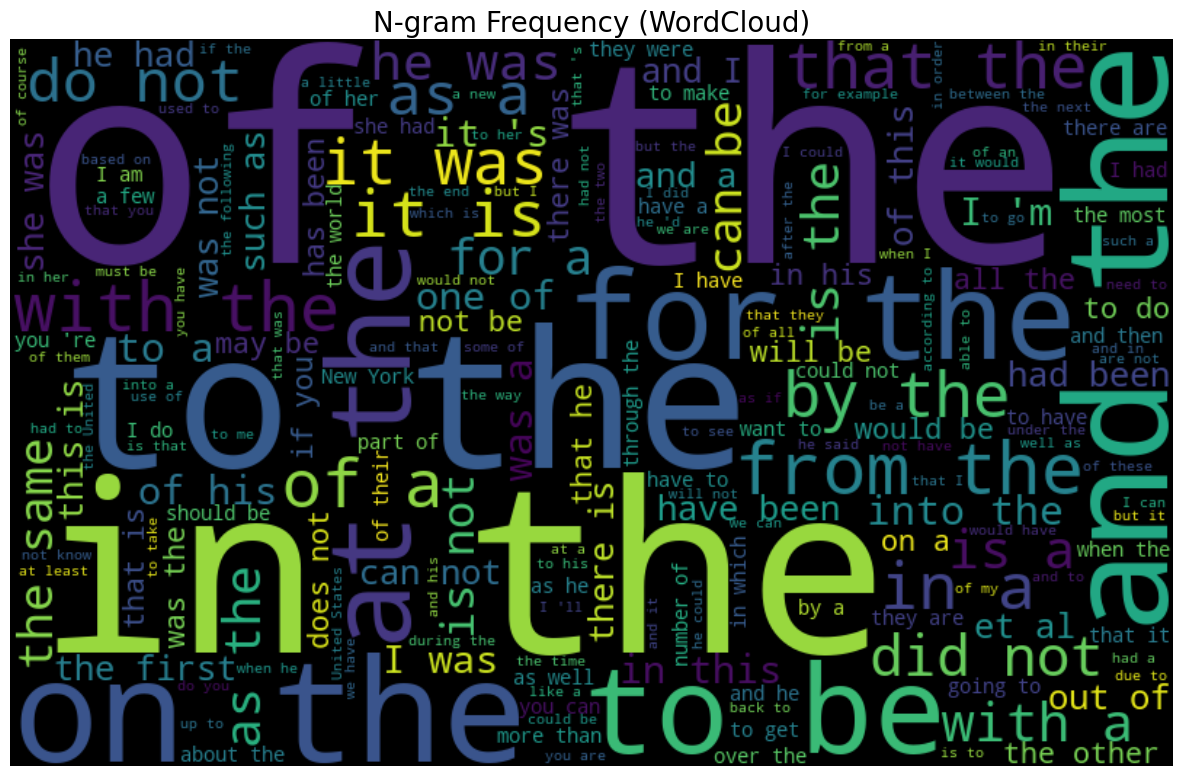

In [77]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500).generate_from_frequencies(df.set_index('ngram')['freq'])
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.title("N-gram Frequency (WordCloud)", fontsize=20)

plt.show()

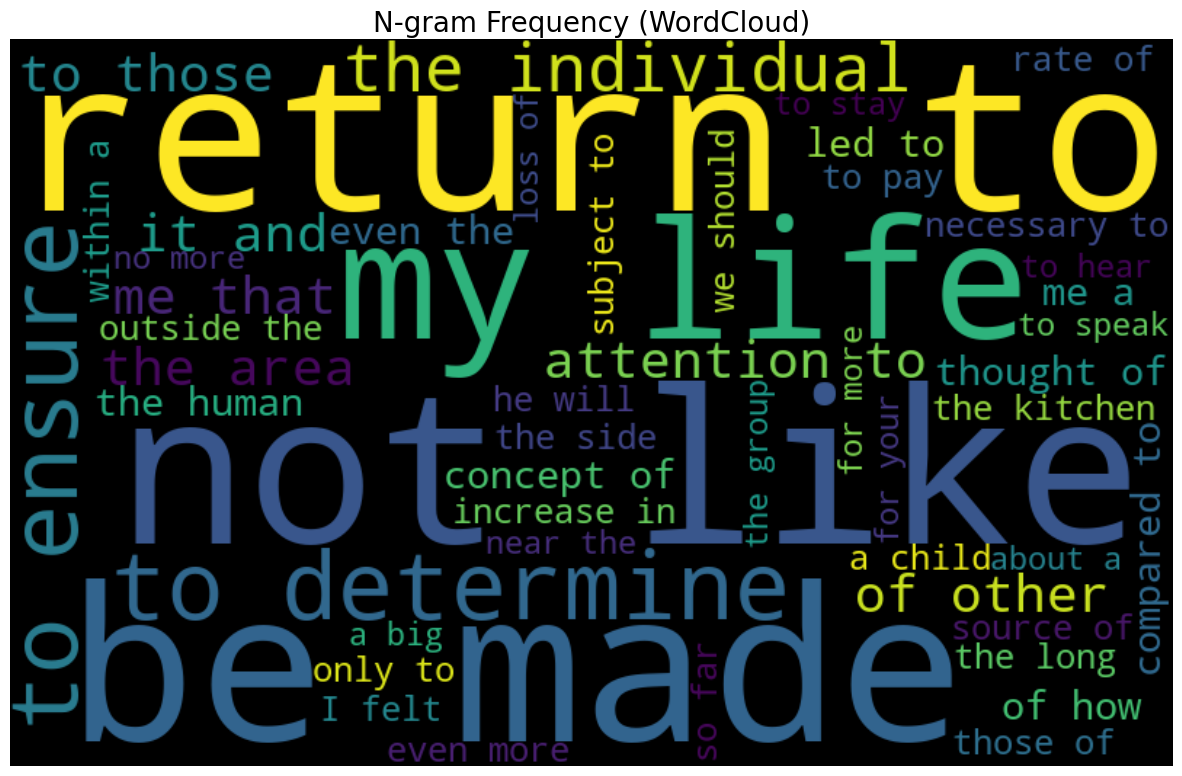

In [78]:
wordcloud = WordCloud(width=800, height=500).generate_from_frequencies(df_part.set_index('ngram')['freq'])
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.title("N-gram Frequency (WordCloud)", fontsize=20)

plt.show()

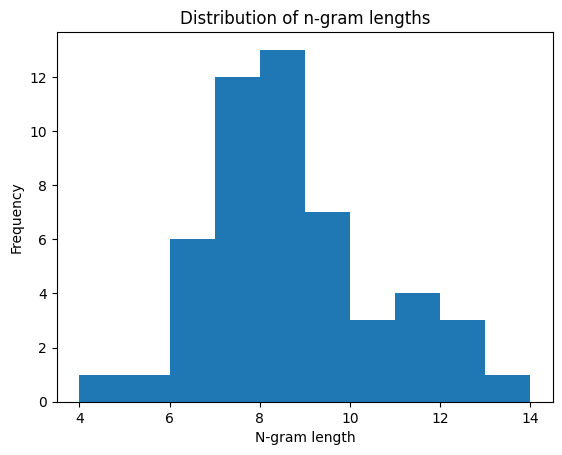

In [79]:
ngram_lengths = df_part['ngram'].apply(len)

plt.hist(ngram_lengths)
plt.xlabel('N-gram length')
plt.ylabel('Frequency')
plt.title('Distribution of n-gram lengths')
plt.show()